In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from model import RealNVP
flow = RealNVP(32,32)
_ = flow.load_state_dict(torch.load('trained_weights.pt', map_location='cpu'))

In [4]:
z = torch.distributions.normal.Normal(0.0, 1.0).sample([10,3,32,32])
with torch.no_grad():
    x = flow.inverse(z)
x = x.permute(0,2,3,1).squeeze().cpu().numpy()
x.shape

(10, 32, 32, 3)

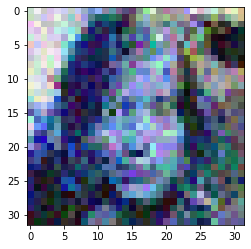

In [3]:
plt.imshow((x-x.min())/(x.max()-x.min()), 'gray')

In [6]:
def min_max_normalize(x):
    return (x-x.min())/(x.max()-x.min())

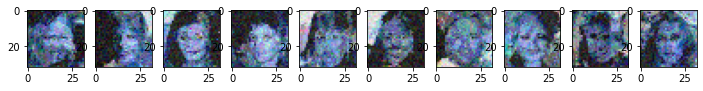

In [9]:
fig, axes = plt.subplots(1,10,figsize=(12,3))
for i in range(10):
    data = min_max_normalize(x[i])
    axes[i].imshow(data)